# Install Julia Kernel

---



In [4]:
%%shell
set -e

#---------------------------------------------------#
JULIA_VERSION="1.9.3" # any version ≥ 0.7.0
JULIA_PACKAGES="IJulia BenchmarkTools"
JULIA_PACKAGES_IF_GPU="CUDA" # or CuArrays for older Julia versions
JULIA_NUM_THREADS=2
#---------------------------------------------------#

if [ -z `which julia` ]; then
  # Install Julia
  JULIA_VER=`cut -d '.' -f -2 <<< "$JULIA_VERSION"`
  echo "Installing Julia $JULIA_VERSION on the current Colab Runtime..."
  BASE_URL="https://julialang-s3.julialang.org/bin/linux/x64"
  URL="$BASE_URL/$JULIA_VER/julia-$JULIA_VERSION-linux-x86_64.tar.gz"
  wget -nv $URL -O /tmp/julia.tar.gz # -nv means "not verbose"
  tar -x -f /tmp/julia.tar.gz -C /usr/local --strip-components 1
  rm /tmp/julia.tar.gz

  # Install Packages
  nvidia-smi -L &> /dev/null && export GPU=1 || export GPU=0
  if [ $GPU -eq 1 ]; then
    JULIA_PACKAGES="$JULIA_PACKAGES $JULIA_PACKAGES_IF_GPU"
  fi
  for PKG in `echo $JULIA_PACKAGES`; do
    echo "Installing Julia package $PKG..."
    julia -e 'using Pkg; pkg"add '$PKG'; precompile;"' &> /dev/null
  done

  # Install kernel and rename it to "julia"
  echo "Installing IJulia kernel..."
  julia -e 'using IJulia; IJulia.installkernel("julia", env=Dict(
      "JULIA_NUM_THREADS"=>"'"$JULIA_NUM_THREADS"'"))'
  KERNEL_DIR=`julia -e "using IJulia; print(IJulia.kerneldir())"`
  KERNEL_NAME=`ls -d "$KERNEL_DIR"/julia*`
  mv -f $KERNEL_NAME "$KERNEL_DIR"/julia

  echo ''
  echo "Successfully installed `julia -v`!"
  echo "Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then"
  echo "jump to the 'Checking the Installation' section."
fi

Installing Julia 1.9.3 on the current Colab Runtime...
2023-11-30 15:52:40 URL:https://storage.googleapis.com/julialang2/bin/linux/x64/1.9/julia-1.9.3-linux-x86_64.tar.gz [146268149/146268149] -> "/tmp/julia.tar.gz" [1]
Installing Julia package IJulia...
Installing Julia package BenchmarkTools...
Installing IJulia kernel...
[ Info: Installing julia kernelspec in /root/.local/share/jupyter/kernels/julia-1.9

Please reload this page (press Ctrl+R, ⌘+R, or the F5 key) then
jump to the 'Checking the Installation' section.


# Methods

---



The concept of multiple dispatch is something we use frequently but never really stop to contemplate.  Julia surfaces multiple dispatch in a concrete and easy fashion compared to operator overloading or templating.

In [ ]:
f(a::Int64, b::Int64) = a + b

f(a::Float64, b::Float64) = a * b

f(a::Number, b::Number) = 2 * (a + b)

println(f(2 , 3))
println(f(2.0, 3.0))
println(f(2, 3.0))

methods(f)

5
6.0
10.0


# 3 methods for generic function "f" from Main:
 [1] f(a::Int64, b::Int64)
     @ In[2]:1
 [2] f(a::Float64, b::Float64)
     @ In[2]:3
 [3] f(a::Number, b::Number)
     @ In[2]:5

In [ ]:
methods(+)

# 207 methods for generic function "+" from Base:
   [1] +(x::T, y::T) where T<:Union{Int128, Int16, Int32, Int64, Int8, UInt128, UInt16, UInt32, UInt64, UInt8}
     @ int.jl:87
   [2] +(x::T, y::T) where T<:Union{Float16, Float32, Float64}
     @ float.jl:408
   [3] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigInt)
     @ Base.GMP gmp.jl:539
   [4] +(c::Union{Int16, Int32, Int64, Int8}, x::BigInt)
     @ Base.GMP gmp.jl:545
   [5] +(c::Union{UInt16, UInt32, UInt64, UInt8}, x::BigFloat)
     @ Base.MPFR mpfr.jl:407
   [6] +(c::Union{Int16, Int32, Int64, Int8}, x::BigFloat)
     @ Base.MPFR mpfr.jl:415
   [7] +(c::Union{Float16, Float32, Float64}, x::BigFloat)
     @ Base.MPFR mpfr.jl:423
   [8] +(x::Union{Dates.CompoundPeriod, Dates.Period})
     @ Dates /usr/local/share/julia/stdlib/v1.9/Dates/src/periods.jl:342
   [9] +(F::LinearAlgebra.Hessenberg, J::LinearAlgebra.UniformScaling)
     @ LinearAlgebra /usr/local/share/julia/stdlib/v1.9/LinearAlgebra/src/hessenberg.jl:647
  [10] +(r::AbstractRange{<:Dates.TimeType}, x::Dates.Period)
     @ Dates /usr/local/share/julia/stdlib/v1.9/Dates/src/ranges.jl:65
  [11] +(x::AbstractArray{<:Dates.TimeType}, y::Union{Dates.CompoundPeriod, Dates.Period})
     @ Dates /usr/local/share/julia/stdlib/v1.9/Dates/src/deprecated.jl:6
  [12] +(A::LinearAlgebra.Tridiagonal, B::LinearAlgebra.Tridiagonal)
     @ LinearAlgebra /usr/local/share/julia/stdlib/v1.9/LinearAlgebra/src/tridiag.jl:754
  [13] +(x::LinearAlgebra.Tridiagonal, H::LinearAlgebra.UpperHessenberg)
     @ LinearAlgebra /usr/local/share/julia/stdlib/v1.9/LinearAlgebra/src/hessenberg.jl:112
  [14] +(A::LinearAlgebra.Tridiagonal, B::LinearAlgebra.SymTridiagonal)
     @ LinearAlgebra /usr/local/share/julia/stdlib/v1.9/LinearAlgebra/src/special.jl:162
  [15] +(A::LinearAlgebra.Tridiagonal, B::LinearAlgebra.Diagonal)
     @ LinearAlgebra /usr/local/share/julia/stdlib/v1.9/LinearAlgebra/src/special.jl:178
  [16] +(A::LinearAlgebra.Tridiagonal, B::LinearAlgebra.Bidiagonal)
     @ LinearAlgebra /usr/local/share/julia/stdlib/v1.9/LinearAlgebra/src/special.jl:198
  [17] +(A::LinearAlgebra.Tridiagonal{var"#s972", V} where {var"#s972"<:Number, V<:AbstractVector{var"#s972"}}, B::LinearAlgebra.UniformScaling)
     @ LinearAlgebra /usr/local/share/julia/stdlib/v1.9/LinearAlgebra/src/special.jl:231
  [18] +(A::SparseArrays.AbstractSparseMatrix, B::LinearAlgebra.Hermitian{<:Any, <:SparseArrays.AbstractSparseMatrix})
     @ SparseArrays /usr/local/share/julia/stdlib/v1.9/SparseArrays/src/linalg.jl:14
  [19] +(A::SparseArrays.AbstractSparseMatrix, B::LinearAlgebra.Hermitian)
     @ SparseArrays /usr/local/share/julia/stdlib/v1.9/SparseArrays/src/linalg.jl:17
  [20] +(A::SparseArrays.AbstractSparseMatrix, B::LinearAlgebra.Symmetric{<:Any, <:SparseArrays.AbstractSparseMatrix})
     @ SparseArrays /usr/local/share/julia/stdlib/v1.9/SparseArrays/src/linalg.jl:14
  [21] +(A::SparseArrays.AbstractSparseMatrix, B::LinearAlgebra.Symmetric)
     @ SparseArrays /usr/local/share/julia/stdlib/v1.9/SparseArrays/src/linalg.jl:17
  [22] +(x::P, y::P) where P<:Dates.Period
     @ Dates /usr/local/share/julia/stdlib/v1.9/Dates/src/periods.jl:75
  [23] +(x::Dates.Period, y::Dates.Period)
     @ Dates /usr/local/share/julia/stdlib/v1.9/Dates/src/periods.jl:331
  [24] +(y::Dates.Period, x::Dates.CompoundPeriod)
     @ Dates /usr/local/share/julia/stdlib/v1.9/Dates/src/periods.jl:333
  [25] +(y::Dates.Period, x::Dates.TimeType)
     @ Dates /usr/local/share/julia/stdlib/v1.9/Dates/src/arithmetic.jl:85
  [26] +(x::Dates.Period, r::AbstractRange{<:Dates.TimeType})
     @ Dates /usr/local/share/julia/stdlib/v1.9/Dates/src/ranges.jl:64
  [27] +(y::Union{Dates.CompoundPeriod, Dates.Period}, x::AbstractArray{<:Dates.TimeType})
     @ Dates /usr/local/share/julia/stdlib/v1.9/Dates/src/deprecated.jl:14
  [28] +(A::LinearAlgebra.UnitUpperTriangular, B::LinearAlgebra.UpperTriangular)
     @ LinearAlgebra /usr/local/share/julia/stdlib/v1.9/LinearAlgebra/src/triangular.jl:646
  [29

# Linear Regression - Julia


   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.9/Project.toml`
  No Changes to `~/.julia/environments/v1.9/Manifest.toml`


  23.419 μs (151 allocations: 21.12 KiB)
  48.217 μs (155 allocations: 127.56 KiB)
  295.429 μs (167 allocations: 1.15 MiB)
  2.946 ms (167 allocations: 11.47 MiB)
[57.26033779848573, -0.08797903319743734]


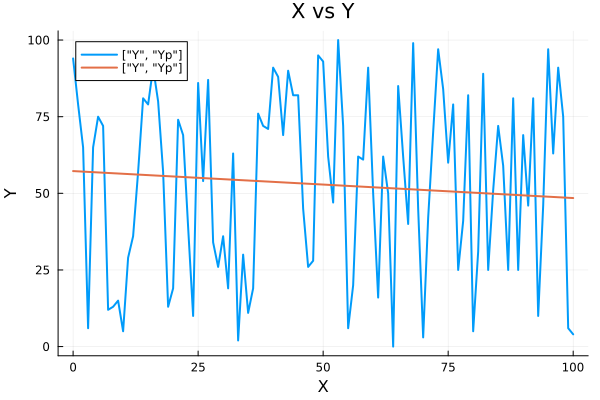

In [39]:
import Pkg
Pkg.add("Plots")
Pkg.add("GLM")
Pkg.add("DataFrames")
using DataFrames
using BenchmarkTools
using GLM
using Plots

# perform the ordinary least squares fits
data1 = DataFrame(X1=collect(0:100), Y1=rand(0:100,101))
data2 = DataFrame(X2=collect(0:1000), Y2=rand(0:100,1001))
data3 = DataFrame(X3=collect(0:10000), Y3=rand(0:100,10001))
data4 = DataFrame(X4=collect(0:100000), Y4=rand(0:100,100001))

ols1 = @btime lm(@formula(Y1 ~ X1), data1)
ols2 = @btime lm(@formula(Y2 ~ X2), data2)
ols3 = @btime lm(@formula(Y3 ~ X3), data3)
ols4 = @btime lm(@formula(Y4 ~ X4), data4)

# plot the points
plot(X1, Y1, linewidth=2, title="X vs Y", label=["Y"], xlabel="X", ylabel="Y")

# display the coefficients
println(coef(ols1))

Yp = predict(ols1); #load predictions into Yp
Yn = Base.hcat(Y1,Yp) #concatenating Y and Yp arrays into a new one called 'Y2' so that we can plot both, below
plot(X1, Yn, linewidth=2, title="X vs Y", label=["Y", "Yp"], xlabel="X", ylabel="Y")

# Linear Regression - Python

In [11]:

import statsmodels.api as sm
import numpy as np
import time

# defining the variables
x1 = list(range(101))
x2 = list(range(1001))
x3 = list(range(10001))
x4 = list(range(100001))
y1 = np.random.uniform(low=0, high=100, size=(101,))
y2 = np.random.uniform(low=0, high=100, size=(1001,))
y3 = np.random.uniform(low=0, high=100, size=(10001,))
y4 = np.random.uniform(low=0, high=100, size=(100001,))

# performing the regression
# and fitting the model
starttime = time.perf_counter()
result = sm.OLS(y1, x1).fit()
endtime = time.perf_counter()
elapsed = endtime - starttime
print(f'Time taken: {elapsed/10E-6} microseconds')

starttime = time.perf_counter()
result = sm.OLS(y2, x2).fit()
endtime = time.perf_counter()
elapsed = endtime - starttime
print(f'Time taken: {elapsed/10E-6} microseconds')

starttime = time.perf_counter()
result = sm.OLS(y3, x3).fit()
endtime = time.perf_counter()
elapsed = endtime - starttime
print(f'Time taken: {elapsed/10E-6} microseconds')

starttime = time.perf_counter()
result = sm.OLS(y4, x4).fit()
endtime = time.perf_counter()
elapsed = endtime - starttime
print(f'Time taken: {elapsed/10E-6} microseconds')

# printing the summary table
print(result.summary())


Time taken: 129.7858999350865 microseconds
Time taken: 115.5106000624073 microseconds
Time taken: 771.9029999861958 microseconds
Time taken: 4281.746500055306 microseconds
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.561
Model:                            OLS   Adj. R-squared (uncentered):              0.561
Method:                 Least Squares   F-statistic:                          1.278e+05
Date:                Thu, 30 Nov 2023   Prob (F-statistic):                        0.00
Time:                        17:14:10   Log-Likelihood:                     -5.0628e+05
No. Observations:              100001   AIC:                                  1.013e+06
Df Residuals:                  100000   BIC:                                  1.013e+06
Df Model:                           1                                                  
Covariance Type:            nonrobus